<a href="https://colab.research.google.com/github/shreya-gundoju/shreya-gundoju/blob/cognizant-ml-training/Copy_of_12_colleges_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Linear regression

**Correlation and Linear Regression**

* Regression is concerned with specifying the relationship between a single numeric dependent variable (the value to be predicted) and one or more numeric independent variables (the predictors).  

* The simplest forms of regression assume that the relationship between the independent and dependent variables follows a straight line.

* You might recall from basic algebra that lines can be defined in a slope-intercept form similar to y = a + bx.

* The slope term b specifies how much y rises for each unit increase in x.

* Positive values define lines that slope upward while negative values define lines that slope downward.

* The term a is known as the intercept because it specifies the point where the line crosses, or intercepts, the vertical y axis. It indicates the value of y when x = 0.

https://www.mathsisfun.com/data/straight_line_graph.html

In [ ]:
# https://www.kaggle.com/datasets/elikplim/concrete-compressive-strength-data-set

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns

df = pd.read_csv('concrete_data.csv')

df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


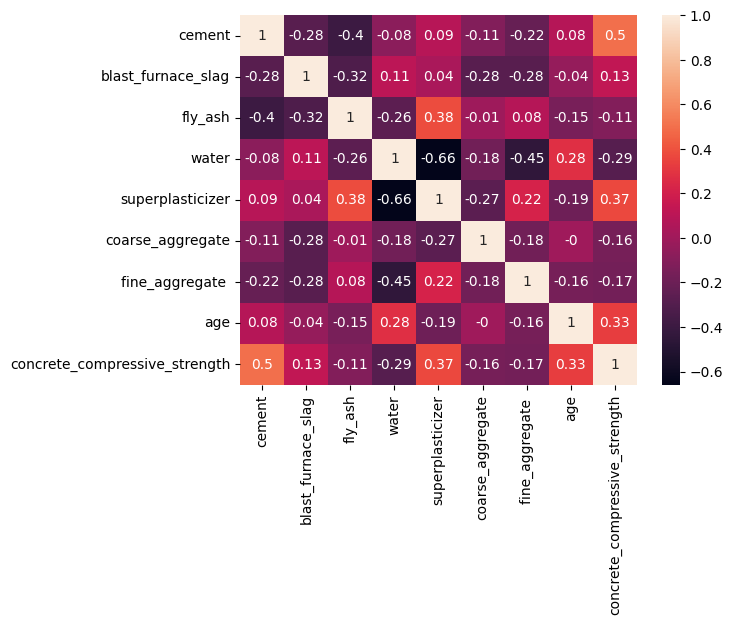

In [ ]:
sns.heatmap(df.corr().round(2),annot=True)
plt.show()

In [ ]:
# define a function that removes outliers
def remove_outliers(data):
    q1 = np.percentile(data,25)
    q3 = np.percentile(data,75)
    iqr = q3-q1
    upper = q3+1.5*iqr
    lower = q1-1.5*iqr
    data[(data>lower)&(data<upper)]
    return data[(data>lower)&(data<upper)]

# create an empty data frame
df_clean = pd.DataFrame()

# populate data frame with no outliers
for name,value in df.iteritems():
    df_clean[name] = remove_outliers(value)

<ipython-input-10-27fedce797d1>:15: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name,value in df.iteritems():


In [ ]:
df_clean.isna().sum()

cement                            0
blast_furnace_slag                2
fly_ash                           0
water                             9
superplasticizer                 10
coarse_aggregate                  0
fine_aggregate                    5
age                              59
concrete_compressive_strength     4
dtype: int64

In [ ]:
# remove missing values
df_clean.dropna(axis=0,inplace=True)

# reset index
df_clean.reset_index(drop=True, inplace=True)
df_clean.isna().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features_clean = df_clean.iloc[:,:-1]
strength_clean = df_clean.iloc[:,-1]

features = df.iloc[:,:-1]
strength = df.iloc[:,-1]

X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    features_clean,strength_clean,test_size=0.3,random_state=42)

X_train, X_test, y_train, y_test = train_test_split(features,strength,test_size=0.3,random_state=42)

In [ ]:
# train check data
regression = LinearRegression()
regression.fit(X_train,y_train)

# print out the results
print(f'Training data r-squared:,{regression.score(X_train, y_train)}')
print(f'Test data r-squared:{regression.score(X_test, y_test)}')

Training data r-squared:,0.6196723710532998
Test data r-squared:0.5943782479239206


In [ ]:
# train check clean data
regression = LinearRegression()
regression.fit(X_train_clean,y_train_clean)

# print out the results
print(f'Training data r-squared:,{regression.score(X_train_clean, y_train_clean)}')
print(f'Test data r-squared:{regression.score(X_test_clean, y_test_clean)}')

Training data r-squared:,0.7745552036054404
Test data r-squared:0.7550275284843796


In [ ]:
y_test_clean[10:13]

215    42.70
628    41.68
542    35.17
Name: concrete_compressive_strength, dtype: float64

In [ ]:
# predict values for test data
y_pred=regression.predict(X_test_clean[10:13])
y_pred

array([36.52803633, 35.7358487 , 46.57107735])

###Decision Trees classification

**Choosing the Best split**
* The first challenge that a decision tree will face is to identify which feature to split upon.

* We look for a way to split the data such that the resulting partitions contained examples primarily of a single class of target variable.

* The degree to which a subset of examples contains only a single class is known as purity, and any subset composed of only a single class is called 100% pure.

**Entropy is a measure of purity**
* Sets with high Entropy are very diverse and provide little information about other items that may also belong in the set, as there is no apparent commonality.  The decision tree hopes to find splits that reduce entropy, ultimately increasing homogeneity within the groups.

* The **information gain** for a feature F is calculated as the difference between the entropy in the segment before the split (S1) and the partitions resulting from the split (S2)

* Decision trees use information gain for splitting on numeric features as well. To do so, a common practice is to test various splits that divide the values into groups greater than or less than a numeric threshold.

* This reduces the numeric feature into a two-level categorical feature that allows information gain to be calculated as usual. The numeric cut point yielding the largest information gain is chosen for the split.

* A decision tree can continue to grow indefinitely, choosing splitting features and dividing the data into smaller and smaller partitions until each example is perfectly classified or the algorithm runs out of features to split on.

* However, if the tree grows overly large, many of the decisions it makes will be overly specific and the model will be overfitted to the training data. The process of pruning a decision tree involves reducing its size such that it generalizes better to unseen data

* One solution to this problem is to stop the tree from growing once it reaches a certain number of decisions or when the decision nodes contain only a small number of examples. This is called early stopping or pre-pruning the decision tree.

* An alternative, called post-pruning, involves growing a tree that is intentionally too large and pruning leaf nodes to reduce the size of the tree to a more appropriate level.
Pruning the tree later on allows the algorithm to be certain that all the important data structures were discovered.


----------
**Gini**

* Both Gini Impurity and Entropy are criteria to split a node in a decision tree. They are standard metrics to compute “impurity”. They guide to split a node in the decision tree only based on the information that exists at that node.

* Gini is intended for continuous attributes, and Entropy for attributes that occur in classes.


In [ ]:
# Simple example
import pandas as pd
from sklearn import tree
from sklearn.model_selection import GridSearchCV

df = pd.read_excel('fit.xlsx')
print(df)

from sklearn.model_selection import train_test_split

y = df['type']
x = df.drop(['type'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

parameters = {'criterion':('gini', 'entropy'),
              }

tr = tree.DecisionTreeClassifier()
gsearch = GridSearchCV(tr, parameters)
gsearch.fit(X_train, y_train)
model = gsearch.best_estimator_
model.criterion

   Age  Lot_of_Pizza  Exercise   type
0   25             1         1    Fit
1   29             1         1    Fit
2   31             0         1    Fit
3   33             0         1    Fit
4   28             0         1    Fit
5   33             1         0  Unfit
6   32             1         0  Unfit
7   25             1         1    Fit
8   29             1         1  Unfit
9   31             0         1    Fit


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


'gini'

In [ ]:
score = model.score(X_test, y_test)
score

1.0

In [ ]:
X_train, y_train

(   Age  Lot_of_Pizza  Exercise
 5   33             1         0
 0   25             1         1
 7   25             1         1
 2   31             0         1
 3   33             0         1
 6   32             1         0
 9   31             0         1
 8   29             1         1,
 5    Unfit
 0      Fit
 7      Fit
 2      Fit
 3      Fit
 6    Unfit
 9      Fit
 8    Unfit
 Name: type, dtype: object)

In [ ]:
X_test, y_test

(   Age  Lot_of_Pizza  Exercise
 4   28             0         1
 1   29             1         1,
 4    Fit
 1    Fit
 Name: type, dtype: object)

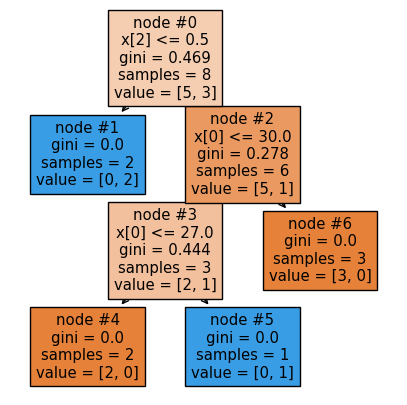

In [ ]:
# decision tree visualization
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(5,5))
tree.plot_tree(model, filled=True, node_ids=True)
plt.show()

In [ ]:
# Bigger example
import numpy as np
import pandas as pd

# Mushroom dataset by Jeff Schlimmer of Carnegie Mellon University.
# The raw dataset is available freely at the UCI Machine Learning Repository
# (https://www.kaggle.com/uciml/mushroom-classification).

df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
from sklearn.model_selection import train_test_split

y = df['class']
x = df.drop(['class'], axis=1)
x = pd.get_dummies(x)
y = pd.get_dummies(y)
print(x.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 117 entries, cap-shape_b to habitat_w
dtypes: uint8(117)
memory usage: 928.4 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   e       8124 non-null   uint8
 1   p       8124 non-null   uint8
dtypes: uint8(2)
memory usage: 16.0 KB
None


In [ ]:
x

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
y

,e,p
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
8119,1,0
8120,1,0
8121,1,0
8122,0,1


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

parameters = {'criterion':('gini', 'entropy'),
              'min_samples_split':[2,3,4,5],
              'max_depth':[9,10,11,12] # try with 3,4
              }

tr = tree.DecisionTreeClassifier()
gsearch = GridSearchCV(tr, parameters)
gsearch.fit(X_train, y_train)
model = gsearch.best_estimator_
print(model.criterion)
print(model.min_samples_split)
print(model.max_depth)

gini
2
9


In [ ]:
y_pred=model.predict(X_test)
score = model.score(X_test, y_test)
print(score)
y_pred

1.0


array([[1, 0],
       [0, 1],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [1, 0]], dtype=uint8)

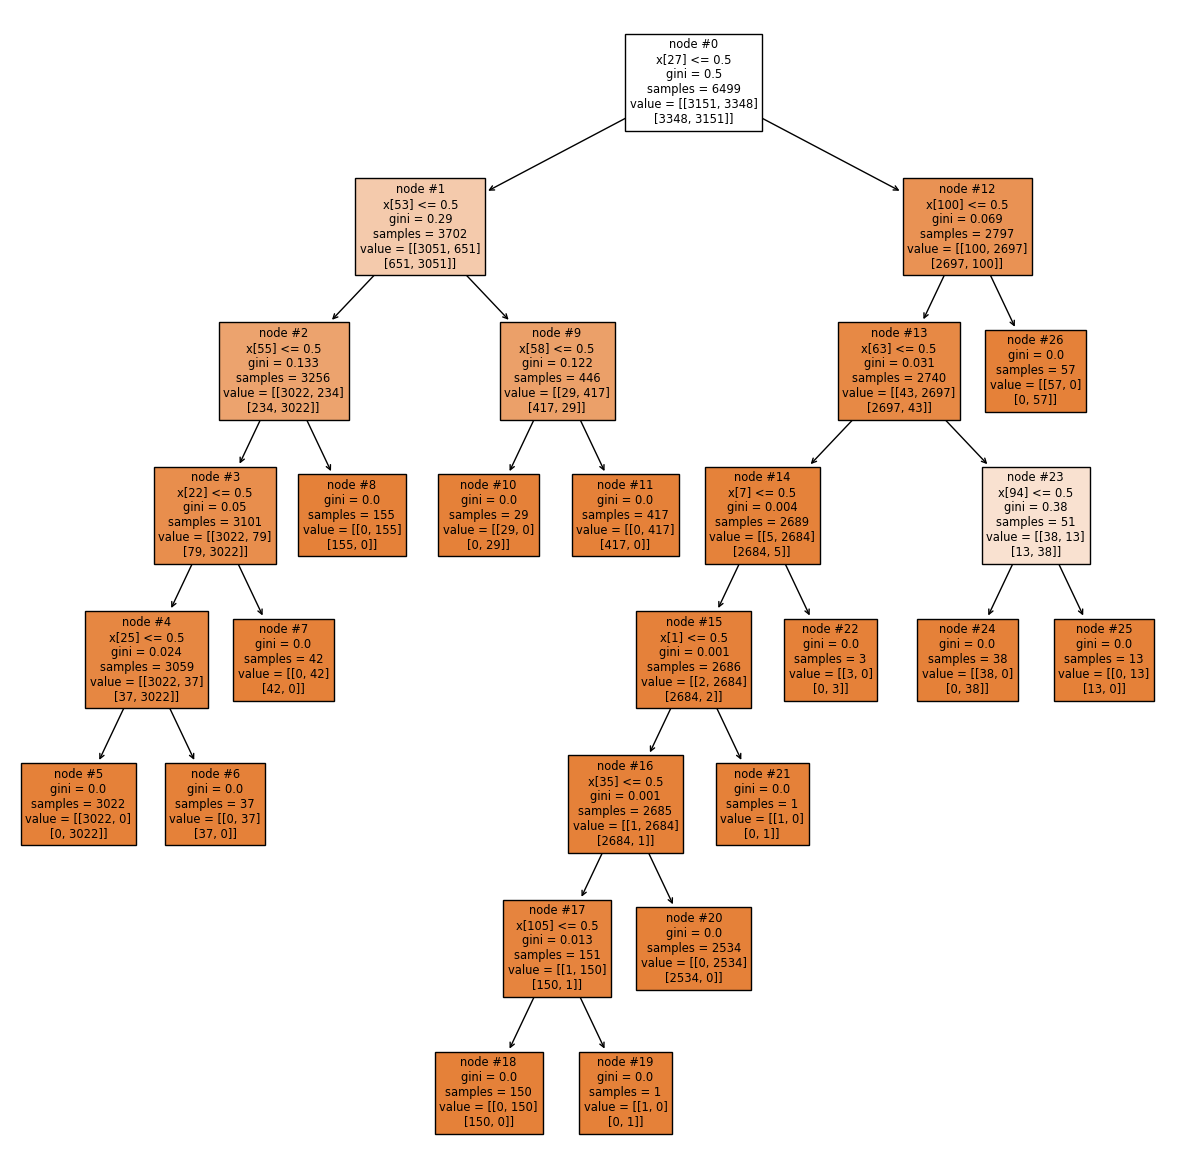

In [ ]:
# decision tree visulaization
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(15,15))
tree.plot_tree(model, filled=True, node_ids=True)
plt.show()


### Ensemble methods

**Max voting**
* The max voting method is generally used for classification problems. In this technique, multiple models are used to make predictions for each data point. The predictions by each model are considered as a ‘vote’. The predictions which we get from the majority of the models are used as the final prediction.

**Averaging**
* Similar to the max voting technique, multiple predictions are made for each data point in averaging. In this method, we take an average of predictions from all the models and use it to make the final prediction. Averaging can be used for making predictions in regression problems or while calculating probabilities for classification problems.

**Weighted average**
* This is an extension of the averaging method. All models are assigned different weights defining the importance of each model for prediction.




---



**Bagging**
* The idea behind bagging is combining the results of multiple models (for instance, all decision trees) to get a generalized result.
* Bootstrapping is a sampling technique in which we create subsets of observations from the original dataset, with replacement.
* Bagging (or Bootstrap Aggregating) technique uses these subsets (bags) to get a fair idea of the distribution (complete set).

**Random forest**
* Random Forest is another ensemble machine learning algorithm that follows the bagging technique. The base estimators in random forest are decision trees. Random forest randomly selects a set of features and rows which are used to decide the best split at each node of the decision tree.
* Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction

**Boosting**
* If a data point is incorrectly predicted by the first model, and then the next (probably all models), will combining the predictions provide better results? Such situations are taken care of by boosting.
* Boosting is a sequential process, where each subsequent model attempts to correct the errors of the previous model. The succeeding models are dependent on the previous model.


In [ ]:
# Bagging using multiple kinds of models
import pandas
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

dataframe = pandas.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")
print(dataframe.head(5))
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
seed = 7

Dtc = SVC() # 76%
#Dtc = GaussianNB() # 75%
#Dtc = KNeighborsClassifier() # 73#
#Dtc = DecisionTreeClassifier() # 76%

model = BaggingClassifier(base_estimator=Dtc, n_estimators=100, random_state=seed)
model.fit(X,Y)
print(model.score(X,Y))

results = model_selection.cross_val_score(model, X, Y, cv=20) # change cv and obeserve different outputs

print(results)

print(results.mean())
print(results.min())
print(results.max())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.7708333333333334


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

[0.69230769 0.76923077 0.74358974 0.74358974 0.74358974 0.66666667
 0.79487179 0.66666667 0.71052632 0.81578947 0.81578947 0.81578947
 0.68421053 0.81578947 0.76315789 0.86842105 0.78947368 0.73684211
 0.78947368 0.78947368]
0.7607624831309041
0.6666666666666666
0.868421052631579


In [ ]:
# Random forest
import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

dataframe = pandas.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")

array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

model = RandomForestClassifier(n_estimators=100, max_features=3)
results = model_selection.cross_val_score(model, X, Y, cv=5)
print(results.mean())

0.7513708513708515


In [ ]:
# Boosting
# AdaBoost - short for Adaptive Boosting.
# AdaBoost is adaptive in the sense that subsequent weak learners are
# tweaked in favor of those instances misclassified by previous classifiers.
# DecisionTreeClasifier is used as the default estimator

import pandas
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier

dataframe = pandas.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")

array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

model = AdaBoostClassifier(n_estimators=100, random_state=123)
results = model_selection.cross_val_score(model, X, Y, cv=5)
print(results.mean())

0.7617604617604619


In [ ]:
# Voting Ensemble for Classification
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

dataframe = pandas.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")

array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
seed = 7

# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
#model2 = RandomForestClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators, weights=[3,2,3])
results = model_selection.cross_val_score(ensemble, X, Y, cv=5)
print(results.mean())

0.7773958068075715


###Multi-Layer Perceptrons


* Nice visualization of MLPs
https://www.youtube.com/watch?v=3JQ3hYko51Y

* Another one https://www.youtube.com/watch?v=Aut32pR5PQA

-----------

* The field of artificial neural networks is often just called Neural Networks or Multilayer Perceptrons.  

* A **Perceptron** is a single neuron model.

**Shallow vs Deep Networks** - Neural netwroks with more than one hidden layer are Deep networks.

* Adding more layers allows for more easy representation of the interactions within the input data, as well as allows for more abstract features to be learned and used as input into the next hidden layer.

* The predictive capability of neural networks comes from the hierarchical or multilayered structure of the networks. The data structure can learn  features at different scales and combine them into higher-order features.

* **Neuron** - The building block for neural networks are artificial neurons. These are simple computational units that have weighted input signals and produce an output signal using an activation function.

* **Neuron Weights** - They are similar to weights in Linear regression. A neuron may have two inputs in which case it requires three weights. One for each input and one for the bias.  Weights are often initialized to small random values, such as values in the range 0 to 0.3. Larger weights indicate increased complexity and fragility of the model.

-----------

**Input or Visible layers**
* The bottom layer that takes input from your dataset is called the visible layer, because it is the exposed part of the network. Often a neural network is drawn with a visible layer with one neuron per input value or column in your dataset.

**Hidden Layers**
* Layers after the input layer are called hidden layers because they are not directly exposed to the input.

**Output Layer**
* The final hidden layer is called the output layer and it is responsible for outputting a value or vector of values that correspond to the format required for the problem. The choice of activation function in the output layer is strongly constrained by the type of problem that you are modeling.





---



**Activation functions :**

* **A neural network without an activation function is essentially just a linear regression model.**

* An activation function is a function that is added into an artificial neural network in order to help the network learn complex patterns in the data. It takes in the output signal from the previous cell and converts it into some form that can be taken as input to the next cell.

* An activation function is a simple mapping of summed weighted input to the output of the neuron.

* Traditionally nonlinear activation functions are used. This allows the network to combine the inputs in more complex ways and in turn provide a richer capability in the functions they can model.

* They also help in keeping the value of the output from the neuron restricted to a certain limit as per our requirement.

* Activation functions are applied at every layer and need to be calculated many times in deep networks. Hence, they should be computationally inexpensive to calculate.




---



* Logistic function also called the **sigmoid** function is used to output a value between 0 and 1. Useful for binary classification.

* The **softmax** is a more generalised form of the sigmoid. It is used in multi-class classification problems. Similar to sigmoid, it produces values in the range of 0–1 therefore it is used as the final layer in classification models. Useful for multiclass-classification.

* The hyperbolic tangent function also called **Tanh** outputs the same distribution over the range -1 to +1.  The tanh function is very similar to the sigmoid function. The only difference is that it is symmetric around the origin.  

* It is usually used in hidden layers of a neural network as it’s values lies between -1 to 1 hence the mean for the hidden layer comes out be 0 or very close to it, hence helps in centering the data by bringing mean close to 0. This makes learning for the next layer much easier.

* The rectifier activation function **ReLU** (Rectified Linear Unit) outputs 0 fro -ve values and the actual value for +ve values

* The main advantage of using the ReLU function over other activation functions is that it does not activate all the neurons at the same time.  Since only a certain number of neurons are activated, the ReLU function is far more computationally efficient.

* **Leaky ReLU** function is nothing but an improved version of the ReLU function. As we saw that for the ReLU function, the gradient is 0 for x<0, which would deactivate the neurons in that region.

* Leaky ReLU is defined to address this problem. Instead of defining the Relu function as 0 for negative values of x, we define it as an extremely small linear component of x.



---



**When to use which Activation funtion?**

* Sigmoid functions and their combinations generally work better in the case of classifiers

* ReLU function is a general activation function and is used in most cases these days

* If we encounter a case of dead neurons in our networks the leaky ReLU function is the best choice

* Always keep in mind that ReLU function should only be used in the hidden layers

* As a rule of thumb, you can begin with using ReLU function and then move over to other activation functions in case ReLU doesn’t provide with optimum results

* No activation function is used for the output layer if it is a regression problem as we are interested in predicting numerical values directly without transform.

**Epochs**

* An epoch is one learning cycle where the learner sees the whole training data set. If you have two batches, the learner needs to go through two iterations for one epoch

* The number of epochs needs to be finetuned based on the validation and training error. As long as they keep dropping training should continue.

* For instance, if the validation error starts increasing that might be a indication of overfitting. You should set the number of epochs as high as possible and terminate training based on the error rates.

**Backpropagation**

* Backpropagation is the central mechanism by which neural networks learn. It is probably the most fundamental building block in a neural network.

* The algorithm is used to effectively train a neural network through a method called chain rule. In simple terms, after each forward pass through a network, backpropagation performs a backward pass while adjusting the model’s parameters (weights and biases).

* The final step in a forward pass is to evaluate the predicted output against an expected output. It happens through a **cost / loss function**. This can be as simple as MSE (mean squared error) or more complex like cross-entropy.

* In other words, backpropagation aims to minimize the cost function by adjusting network’s weights and biases. The level of adjustment is determined by the gradients of the cost function with respect to those parameters.

* It uses the Gradient descent algorithm.


---


**Cost / Loss Functions**

* Loss functions are helpful to train a neural network. Given an input and a target, they calculate the loss, i.e difference between output and target variable.

* A loss function is for a single training example. It is also sometimes called an error function. A cost function, on the other hand, is the average loss over the entire training dataset. The optimization strategies aim at minimizing the cost function.

* **Optimizers** are algorithms or methods used to change the attributes of your neural network such as weights and learning rate in order to reduce the losses - Explained in-depth later

**Different Loss functions**

* For Regression - **MSE** (Mean Square Error)

* Mean squared error is calculated as the average of the squared differences between the predicted and actual values. The result is always positive. The squaring means that larger mistakes result in more error than smaller mistakes, meaning that the model is punished for making larger mistakes.

* For Classification - **Cross-entropy** will calculate a score that summarizes the average difference between the actual and predicted probability distributions

    * Binary Cross-Entropy
    * Sparse Categorical Cross-Entropy

* Know more at https://www.analyticsvidhya.com/blog/2019/08/detailed-guide-7-loss-functions-machine-learning-python-code/


**Binary Classification with MLP**

In [ ]:
# https://www.kaggle.com/uciml/pima-indians-diabetes-database

import pandas as pd
import numpy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

dataset = pd.read_csv('diabetes.csv')

y = dataset['Outcome']
X = dataset.drop(['Outcome'], axis = 1)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = Sequential()
# The first layer has 8 nodes and uses the relu activation function.
# The line of code that adds the first Dense layer is doing 2 things,
# defining the input or visible layer and the first hidden layer

#The implicit input layer is the reason why you have to include an
#input_dim argument only in the first (explicit) layer of the model
#in the Sequential API - in subsequent layers, the input shape
#is inferred from the output of the previous ones

# first layer
model.add(Dense(8, input_dim=8, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
#model.add(Dense(64, activation='relu'))
# output layer
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# 9 (8+1)*8
# 9 (8+1)*16
# 17 (16+1)*32
# 33 (32+1)*1

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 16)                144       
                                                                 
 dense_5 (Dense)             (None, 32)                544       
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 793
Trainable params: 793
Non-trainable params: 0
_________________________________________________________________


In [ ]:
numpy.random.seed(7)
# verbose=0 will show you nothing (silent)
# verbose=1 will show you an animated progress bar
# verbose=2 will just mention the number of epochs

# batch size determines how many rows should be taken at a time.
# default is 32 etc. based on loss function
hist=model.fit(X_train_scaled, y_train, epochs=100, verbose=1)
# increase no of epochs and see

# history attribute is a dictionary recording training loss values
# and metrics values at successive epochs, as well as validation
# loss values and validation metrics values (if applicable).
print(hist.history)

score = model.evaluate(X_test_scaled, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# save model with weights if required
model.save("model.h5")
print("Saved model to disk")

Epoch 1/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3989 - accuracy: 0.8090
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3992 - accuracy: 0.8142
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 0.3978 - accuracy: 0.8142
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 0.3970 - accuracy: 0.8073
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 0.3968 - accuracy: 0.8108
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 0.3962 - accuracy: 0.8108
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 0.3952 - accuracy: 0.8056
Epoch 8/100
18/18 [==============================] - 0s 3ms/step - loss: 0.3941 - accuracy: 0.8108
Epoch 9/100
18/18 [==============================] - 0s 3ms/step - loss: 0.3935 - accuracy: 0.8090
Epoch 10/100
18/18 [==============================] - 0s 3ms/step - loss: 0.3940 - accuracy: 0.8038
Epoch 11/

**Saving a model along with wieghts can save lot of time especally if it very complex**

* Keras supports saving a single HDF5 file containing the model's architecture, weights values, and compile() information.

In [ ]:
from keras.models import load_model
# load model
new_model = load_model('model.h5')

score = new_model.evaluate(X_test_scaled, y_test, batch_size=40)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

5/5 [==============================] - 0s 3ms/step - loss: 0.6316 - accuracy: 0.7917
Test loss: 0.6315990090370178
Test accuracy: 0.7916666865348816


In [ ]:
df_new=pd.read_csv('diabetes_new.csv')
pred=new_model.predict(df_new)
pred

1/1 [==============================] - 0s 23ms/step


array([[0.],
       [1.]], dtype=float32)



---



**Regression with MLP**

In [ ]:
from tensorflow.keras.datasets import boston_housing
from sklearn.preprocessing import StandardScaler

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled[0])

57026/57026 [==============================] - 0s 0us/step
[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]


In [ ]:
from tensorflow.keras import models, layers

model = models.Sequential()

print(X_train.shape)

model.add(layers.Dense(8, activation='relu', input_shape=[X_train.shape[1]]))
model.add(layers.Dense(16, activation='relu'))

# output layer
model.add(layers.Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100)

(404, 13)
Epoch 1/100
11/11 [==============================] - 1s 20ms/step - loss: 553.7166 - mae: 21.5912 - val_loss: 625.0964 - val_mae: 23.1912
Epoch 2/100
11/11 [==============================] - 0s 6ms/step - loss: 544.8049 - mae: 21.3790 - val_loss: 616.1680 - val_mae: 22.9858
Epoch 3/100
11/11 [==============================] - 0s 7ms/step - loss: 535.2081 - mae: 21.1456 - val_loss: 606.6434 - val_mae: 22.7629
Epoch 4/100
11/11 [==============================] - 0s 7ms/step - loss: 524.8602 - mae: 20.8904 - val_loss: 596.6042 - val_mae: 22.5244
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 514.0745 - mae: 20.6144 - val_loss: 585.5591 - val_mae: 22.2575
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 502.0268 - mae: 20.3061 - val_loss: 573.4595 - val_mae: 21.9630
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 488.5423 - mae: 19.9562 - val_loss: 559.6848 - val_mae: 21.6281
Epoch 8/100
11/11 [===========

In [ ]:
# The output values represent the loss (Mean Squarred Error) and
# the metrics (Mean Absolute Error)
model.evaluate(X_test_scaled, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 28.8466 - mae: 3.9415


[28.846601486206055, 3.94154691696167]

In [ ]:
# we get a sample data (the first 2 inputs from the training data)
to_predict = X_train_scaled[:2]

predictions = model.predict(to_predict)
print(predictions)
print(y_train[:2])

1/1 [==============================] - 0s 59ms/step
[[15.134448]
 [40.933304]]
[15.2 42.3]


**Optimizer functions**

* Optimizers are algorithms or methods used to change the attributes of your neural network such as weights and learning rate in order to reduce the losses.

* Gradient descent, Stochastic Gradient descent, Mini-Batch Gradient descent

* Adaptive gradient descent algorithms such as Adagrad, RMSprop, Adam, provide an alternative to classical SGD. They have per-parameter learning rate methods.


###CNN s


* https://www.youtube.com/watch?v=f0t-OCG79-U

* **Convolution** : Dictionary meaning - a thing that is complex and difficult to follow. a coil or twist

* Convolutional Neural Networks are a powerful artificial neural network technique.

* These networks preserve the spatial structure like edges etc. of the problem and were developed for object recognition tasks such as handwritten digit recognition.

* Feature are learned and used across the whole image, allowing for the objects in the images to be shifted or translated in the scene and still detectable by the network.

* It is this reason why the network is so useful for object recognition in photographs, picking out digits, faces, objects and so on with varying orientation.

**There are three types of layers in a Convolutional Neural Network:**
1. Convolutional Layers.
2. Pooling Layers.
3. Fully-Connected Layers.



---



**Convolutional layers are comprised of filters and feature maps.**


* A convolution layer is like a flashlight that is shining over the top left of the image. Let’s say that the light this flashlight shines covers a 5 x 5 area. And now, let’s imagine this flashlight sliding across all the areas of the input image. In machine learning terms, this flashlight is called a filter(or sometimes referred to as a neuron or a kernel) and the region that it is shining over is called the receptive field.  The filters are essentially the neurons of the layer. They have both weighted inputs and generate an output value like a neuron.

* The weights are adjusted in such a way as to learn / detect the patterns in the image like edges, shapes etc.

* The feature map is the output of one filter applied to the previous layer. A given filter is drawn across the entire previous layer, moved one pixel at a time. Each position results in an activation of the neuron and the output is collected in the feature map.

* The distance that filter is moved across the input from the previous layer at each activation is referred to as the stride.

* Max pooling is a pooling operation that selects the maximum element from the region of the feature map covered by the filter. Thus, the output after max-pooling layer would be a feature map containing the most prominent features of the previous feature map.  It is to reduce overfitting and to increase computational speed.

* In between the convolutional layer and the fully connected layer, there is a 'Flatten' layer. Flattening transforms a two-dimensional matrix of features into a vector that can be fed into a fully connected neural network classifier.

* Learn more at https://adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks/

In [ ]:

import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images.
train_images = (train_images / 255)
test_images = (test_images / 255)

# Reshape the images. CNNs requires the third dimension.
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

print(train_images.shape)
print(test_images.shape)



11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
num_filters = 8
filter_size = 3
pool_size = 2

# Build the model.
model = Sequential([
  Conv2D(
    num_filters,
    filter_size,
    input_shape=(28, 28, 1),
    strides=1,
    ),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

# Compile the model.
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  validation_data=(test_images, to_categorical(test_labels)),
)

Epoch 1/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2507 - accuracy: 0.9281 - val_loss: 0.1309 - val_accuracy: 0.9624
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1007 - accuracy: 0.9696 - val_loss: 0.0926 - val_accuracy: 0.9716
Epoch 3/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0674 - accuracy: 0.9799 - val_loss: 0.0645 - val_accuracy: 0.9799
Epoch 4/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0493 - accuracy: 0.9849 - val_loss: 0.0638 - val_accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0382 - accuracy: 0.9880 - val_loss: 0.0584 - val_accuracy: 0.9818


In [ ]:
# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(predictions)
print(np.argmax(predictions, axis=1))

# Check our predictions against the ground truths.
print(test_labels[:5])

1/1 [==============================] - 0s 198ms/step
[[1.15229234e-07 3.75183760e-07 5.05958360e-06 3.39941871e-05
  4.35738414e-08 7.72664688e-09 1.88264638e-12 9.99959826e-01
  2.05789888e-07 4.12615549e-07]
 [1.18748185e-08 5.34070566e-08 9.99933481e-01 6.63942265e-05
  8.18422004e-14 1.40898315e-09 1.01236147e-07 3.38005150e-13
  9.57851842e-09 7.35363105e-14]
 [1.21742073e-06 9.99910593e-01 5.80792857e-06 5.10812868e-07
  4.35022193e-05 2.45265960e-06 5.95488359e-07 2.30238129e-05
  1.09251414e-05 1.34839365e-06]
 [9.99765813e-01 5.23953370e-09 2.22337389e-04 1.68161822e-08
  9.53972101e-09 3.69761665e-07 6.00910653e-06 1.84457022e-07
  1.95364152e-08 5.22060327e-06]
 [2.15801123e-07 3.45516992e-06 5.49431570e-06 1.56788900e-07
  9.96993661e-01 1.65280130e-06 9.42611678e-06 2.51285353e-04
  6.68756984e-05 2.66770506e-03]]
[7 2 1 0 4]
[7 2 1 0 4]


**More examples**

https://www.tensorflow.org/tutorials/images/cnn

### NLP

**Text vectorization**

* Since the beginning of the brief history of Natural Language Processing (NLP), there has been the need to transform text into something a machine can understand. That is, transforming text into a meaningful vector (or array) of numbers. The de-facto standard way of doing this in the pre-deep learning era was to use a **bag of words** approach.

* The idea behind this method is straightforward, though very powerful. First, we define a fixed length vector where each entry corresponds to a word in our pre-defined dictionary of words. The size of the vector equals the size of the dictionary. Then, for representing a text using this vector, we count how many times each word of our dictionary appears in the text and we put this number in the corresponding vector entry.

* Bag of words indicates the count of each word in the document. This simple model is used, for example, in naive Bayes

* Note that each row in a Document Term Matrix (DTM) corresponds to a word vector.

* In text mining, it is important to create the **document-term matrix (DTM)** of the corpus we are interested in. A DTM is basically a matrix, with documents designated by rows and words by columns, that the elements are the counts or the weights (usually by tf-idf).

* To improve this representation, you can use some more advanced techniques like removing stopwords, lemmatizing words, using n-grams or using tf-idf instead of counts.

* The problem with this method is that it doesn’t capture the meaning of the text, or the context in which words appear, even when using n-grams.

* Learn more athttps://www.mygreatlearning.com/blog/bag-of-words/



---




**TF-IDF**

* It is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents.

* TF-IDF are word frequency scores that try to highlight words that are more interesting, e.g. frequent in a document but not across documents. The TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents

**Sparse vs Dense matrices**

* Matrices that contain mostly zero values are called sparse, distinct from matrices where most of the values are non-zero, called dense.


* It is computationally expensive to represent and work with sparse matrices as though they are dense, and much improvement in performance can be achieved by converting them into dense arrays / matrices

* Learn more at https://www.geeksforgeeks.org/sparse-matrix-representation/

**Spam classification using Naive Bayes**

* It works well for linearly non-separable data as it relies on probability rather than on any hyper-plane etc.

In [ ]:
# Get the data from https://www.kaggle.com/uciml/sms-spam-collection-dataset
# SMS spam classification
import pandas as pd
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

smsDF=pd.read_csv("spam.csv", encoding='ISO-8859-1')
smsDF.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
smsDF=smsDF.drop(columns=['Unnamed: 2',	'Unnamed: 3',	'Unnamed: 4'])

smsDF.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
sw = stopwords.words('english')
def stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    return " ".join(text)

print(smsDF.head())
smsDF['v2'] = smsDF['v2'].apply(stopwords)
smsDF.head()

     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


,v1,v2
0,ham,"go jurong point, crazy.. available bugis n gre..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor... u c already say...
4,ham,"nah think goes usf, lives around though"


In [ ]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

def stemming(text):
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

print(smsDF.head())
smsDF['v2'] = smsDF['v2'].apply(stemming)
print(smsDF.head())

     v1                                                 v2
0   ham  go jurong point, crazy.. available bugis n gre...
1   ham                      ok lar... joking wif u oni...
2  spam  free entry 2 wkly comp win fa cup final tkts 2...
3   ham          u dun say early hor... u c already say...
4   ham            nah think goes usf, lives around though
     v1                                                 v2
0   ham  go jurong point, crazy.. avail bugi n great wo...
1   ham                        ok lar... joke wif u oni...
2  spam  free entri 2 wkli comp win fa cup final tkts 2...
3   ham          u dun say earli hor... u c alreadi say...
4   ham              nah think goe usf, live around though


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# extract the tfid representation matrix of the text data
tfid_matrix = tfid_vectorizer.fit_transform(smsDF['v2'])
print(type(tfid_matrix))
print(tfid_matrix[0])
print(tfid_matrix.shape)


<class 'scipy.sparse._csr.csr_matrix'>
  (0, 7768)	0.18921724597291265
  (0, 1055)	0.3425363092743615
  (0, 3417)	0.16074941421717273
  (0, 1981)	0.2893760582598872
  (0, 1697)	0.3269879325881659
  (0, 4244)	0.2893760582598872
  (0, 7974)	0.22962586282138506
  (0, 3457)	0.18886704248639122
  (0, 1699)	0.30040780708092873
  (0, 1283)	0.2652707924072797
  (0, 2239)	0.3073992946007125
  (0, 5597)	0.25827930488749584
  (0, 4128)	0.3425363092743615
  (0, 3373)	0.13813519804363328
(5572, 8158)


In [ ]:
print(tfid_matrix[300])

  (0, 2489)	0.4363004076017161
  (0, 3651)	0.36858834742637536
  (0, 6619)	0.34878383940180097
  (0, 1302)	0.34125451489376435
  (0, 4288)	0.2561210498967912
  (0, 7251)	0.40950423675239317
  (0, 3080)	0.26778946875694515
  (0, 5998)	0.29791514266610997
  (0, 3417)	0.20475211837619658


In [ ]:
# collect the sparse matrix into dense one
array = tfid_matrix.todense()
print(type(array))
print(array[0])
print(array.shape)

<class 'numpy.matrix'>
[[0. 0. 0. ... 0. 0. 0.]]
(5572, 8158)


In [ ]:
df = pd.DataFrame(array)
df[(df[10] != 0)].head()

,0,1,2,3,4,5,6,7,8,9,...,8148,8149,8150,8151,8152,8153,8154,8155,8156,8157
462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df['v1']=smsDF['v1']

In [ ]:
from sklearn.model_selection import train_test_split

features = df.columns.tolist()
features.remove('v1')

X_train, X_test, y_train, y_test = train_test_split(df[features], df['v1'], test_size=0.33)

* **Bernoulli Naive Bayes :** It assumes that all our features are binary

* **Multinomial Naive Bayes :** Its is used when we have discrete data (e.g. movie ratings ranging 1 and 5 as each rating will have certain frequency to represent). In text learning we have the count of each word to predict the class or label.

* **Gaussian Naive Bayes :** Because of the assumption of the normal distribution, Gaussian Naive Bayes is used in cases when all our features are continuous.

In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score

#model=GaussianNB() # .89
model=BernoulliNB() # .97
#model=MultinomialNB() # .95

model.fit(X_train,y_train)
y_pred=model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % acc)


Accuracy: 0.973
